<a id='header'></a>
# Demo for performing PCA on sampled data sets

In this notebook we present how PCA can be performed on sampled data sets using various functionalities available within `preprocess` and `reduction` modules.
Those functionalities essentially allow to compare PCA done on the original full data set $\mathbf{X}$ and on the sampled data set $\mathbf{X_r}$. There are several options for how information about $\mathbf{X_r}$ can *bias* Principal Component Analysis. Four options are implemented in `PCAfold` and they can be selected using `biasing_option` parameter. The user is referred to the software documentation for more information on the available options (**User guide** $\rightarrow$ **Data reduction** $\rightarrow$ **Biasing options**).

### PCA on sampled data set

A data set representing combustion of syngas in air generated from steady laminar flamelet model using [*Spitfire*](https://github.com/sandialabs/Spitfire) software [1] and a chemical mechanism by Hawkes et al. [2] is used as a demo data set. We present a workflow for performing cluster-biased PCA on that data set using available functions:

- [**Section 1**](#run_cluster_equilibration): Equilibrating cluster populations
- [**Section 2**](#centers_change): Visualizing data set centers change
- [**Section 3**](#eigenvector_weights_movement): Visualizing eigenvector weights movement
- [**Section 4**](#eigenvalue_distribution): Visualizing eigenvalue distribution
- [**Section 5**](#biased_manifold): Visualizing the biased manifold
- [**Section 6**](#generalized_sampling): Generalization of PCA on sampled data set

> [1] [M. A. Hansen - *Spitfire*, 2020](https://github.com/sandialabs/Spitfire)
> 
> [2] E. R. Hawkes, R. Sankaran, J. C. Sutherland, J. H. Chen - *Scalar mixing in direct numerical simulations of temporally evolving plane jet flames with skeletal co/h2 kinetics*, Proceedings of the combustion institute 31 (1) (2007) 1633–1640

***

**Should plots be saved?**

In [1]:
save_plots = False

***

In [2]:
from PCAfold import preprocess
from PCAfold import reduction
from PCAfold import DataSampler
from PCAfold import PCA
import numpy as np

In [3]:
# Original variables:
state_space = np.genfromtxt('data-state-space.csv', delimiter=',')

# Corresponding source terms of the original variables:
state_space_sources = np.genfromtxt('data-state-space-sources.csv', delimiter=',')

# Mixture fraction vector:
mf = np.genfromtxt('data-mixture-fraction.csv', delimiter=',')

In [4]:
# Select scaling method as per `preprocess.center_scale` function:
scal_crit = 'auto'

# Select biasing option:
biasing_option = 2

# Select number of clusters to partition the data set:
n_clusters = 4

# Select number of Principal Components that will be returned:
n_components = 2

# Set random seed for clustering and sampling techniques:
random_seed = 100

# Create labels for legends:
legend_label = ['$\mathbf{X}$', '$\mathbf{X_r}$']

# Create a list for variable annotations:
state_space_names = ['$T$', '$H_2$', '$O_2$', '$O$', '$OH$', '$H_2O$', '$H$', '$HO_2$', '$CO$', '$CO_2$', '$HCO$']

# By default plots will not be saved:
save_filename = None

Perform global PCA on the data set and transform source terms of the original variables:

In [5]:
# Instantiate PCA class object:
pca_X = PCA(state_space, scaling='auto', n_components=2)

# Transform source terms of the original variables to PC-space:
S_Z = pca_X.transform(state_space_sources, nocenter=True)

We start with clustering the data set that will result in an `idx` vector. Clustering can be performed with any technique of choice. Here we will use one of the available functions from the `preprocess` module `preprocess.zero_neighborhood_bins` and use the first Principal Component source term as the conditioning variable:

In [6]:
# Cluster the data set:
idx = preprocess.zero_neighborhood_bins(S_Z[:,0], k=4, zero_offset_percentage=2, split_at_zero=True, verbose=True)

Border values for bins:
[-87229.83051401  -2287.56587856      0.           2287.56587856
  27148.46341416]

Bounds for cluster 0:
	-87229.8305, -2288.0867
Bounds for cluster 1:
	-2286.3687, -0.0
Bounds for cluster 2:
	0.0, 2286.6953
Bounds for cluster 3:
	2288.3, 27148.4634


Visualize the result of clustering:

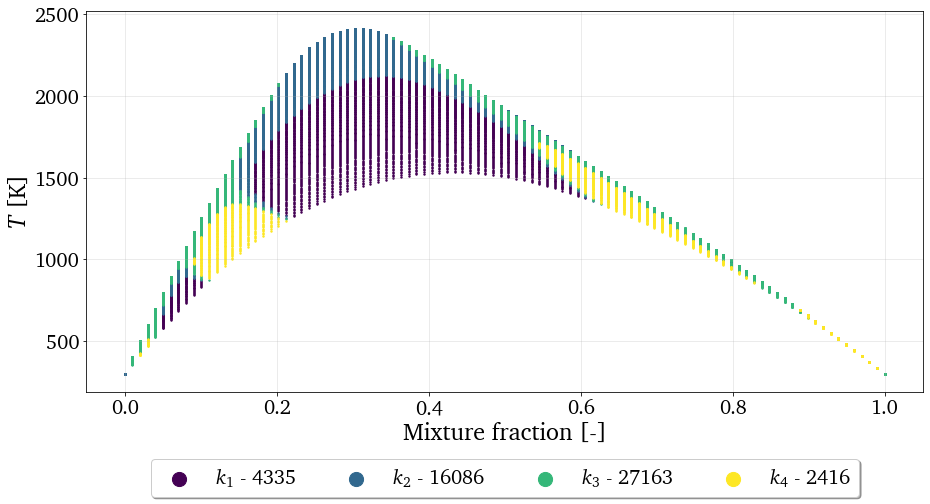

In [7]:
plt = preprocess.plot_2d_clustering(mf, state_space[:,0], idx, x_label='Mixture fraction [-]', y_label='$T$ [K]', color_map='viridis', first_cluster_index_zero=False, grid_on=True, figure_size=(15, 7), save_filename=None)

***
<a id='run_cluster_equilibration'></a>
## Run cluster equilibration

[**Go up**](#header)

Notice that with `verbose=True` the function prints out the current number of samples taken from each cluster at each iteration.

In [8]:
(eigenvalues, eigenvectors, pc_scores, _, idx_train, _, _) = reduction.equilibrate_cluster_populations(state_space, idx, scaling=scal_crit, X_source=[], n_components=n_components, biasing_option=biasing_option, n_iterations=10, stop_iter=0, random_seed=random_seed, verbose=True)

Biasing is performed with option 2.

At iteration 1 taking samples:
{0: 4144, 1: 14719, 2: 24689, 3: 2416}

At iteration 2 taking samples:
{0: 3953, 1: 13352, 2: 22215, 3: 2416}

At iteration 3 taking samples:
{0: 3762, 1: 11985, 2: 19741, 3: 2416}

At iteration 4 taking samples:
{0: 3571, 1: 10618, 2: 17267, 3: 2416}

At iteration 5 taking samples:
{0: 3380, 1: 9251, 2: 14793, 3: 2416}

At iteration 6 taking samples:
{0: 3189, 1: 7884, 2: 12319, 3: 2416}

At iteration 7 taking samples:
{0: 2998, 1: 6517, 2: 9845, 3: 2416}

At iteration 8 taking samples:
{0: 2807, 1: 5150, 2: 7371, 3: 2416}

At iteration 9 taking samples:
{0: 2616, 1: 3783, 2: 4897, 3: 2416}

At iteration 10 taking samples:
{0: 2416, 1: 2416, 2: 2416, 3: 2416}


***
<a id='centers_change'></a>
## Centers change

We are going to plot the normalized centers of the original full data set $\mathbf{X}$ versus the centers of the sampled data set $\mathbf{X_r}$ using a function from the `preprocess` module.

[**Go up**](#header)

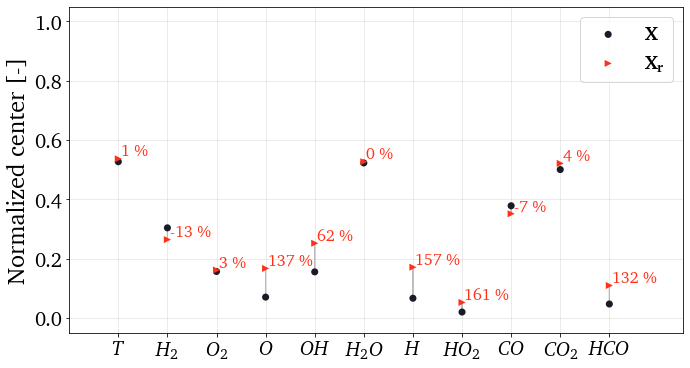

In [9]:
if save_plots: save_filename = '../images/centers-change'
(centers_X, centers_X_r, perc, plt) = reduction.analyze_centers_change(state_space, idx_train, variable_names=state_space_names, legend_label=legend_label, save_filename=save_filename)

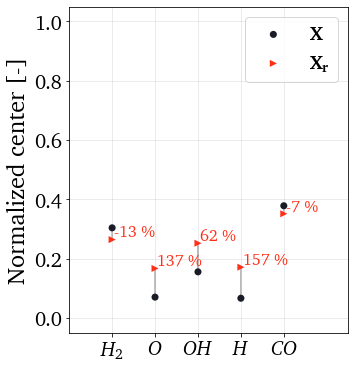

In [10]:
if save_plots: save_filename = '../images/centers-change-selected-variables'
(centers_X, centers_X_r, perc, plt) = reduction.analyze_centers_change(state_space, idx_train, variable_names=state_space_names, plot_variables=[1,3,4,6,8], legend_label=legend_label, save_filename=save_filename)

***
<a id='eigenvector_weights_movement'></a>
## Eigenvector weights movement

[**Go up**](#header)

We are going to plot the first eigenvector (PC-1) weights movement with three variants of normalization. To access the first eigenvector one can simply do:

```python
eigenvectors[:,0,:]
```

similarly, to access the second eigenvector:

```python
eigenvectors[:,1,:]
```

and so on.

Let's start with no normalization `normalize=False`:

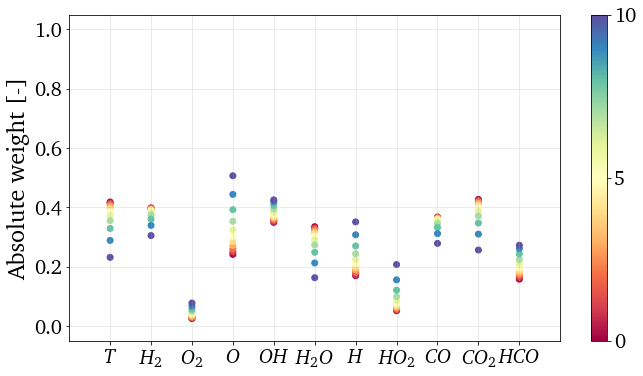

In [11]:
if save_plots: save_filename = '../images/eigenvector-weights-movement-non-normalized'
plt = reduction.analyze_eigenvector_weights_change(eigenvectors[:,0,:], state_space_names, plot_variables=[], normalize=False, zero_norm=False, save_filename=save_filename)

Normalization with `normalize=True` and `zero_norm=False`:

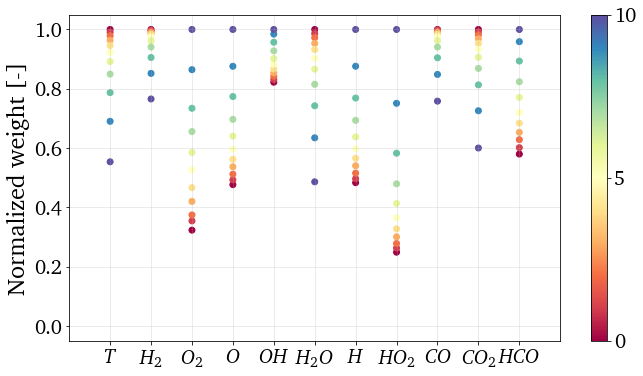

In [12]:
if save_plots: save_filename = '../images/eigenvector-weights-movement-normalized'
plt = reduction.analyze_eigenvector_weights_change(eigenvectors[:,0,:], state_space_names, plot_variables=[], normalize=True, zero_norm=False, save_filename=save_filename)

Normalization with `normalize=True` and `zero_norm=True`:

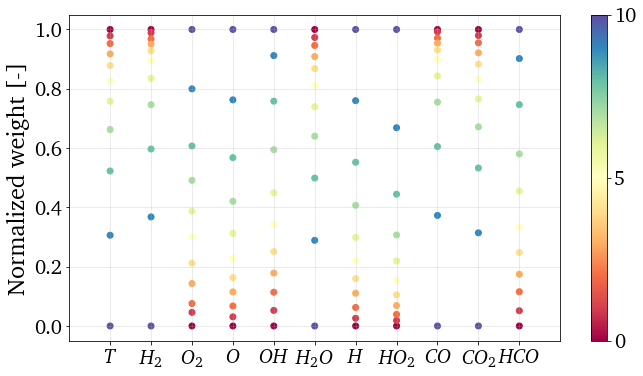

In [13]:
if save_plots: save_filename = '../images/eigenvector-weights-movement-normalized-to-zero'
plt = reduction.analyze_eigenvector_weights_change(eigenvectors[:,0,:], state_space_names, plot_variables=[], normalize=True, zero_norm=True, save_filename=save_filename)

Note that in the above example the color bar marks the iteration number and so the $0^{th}$ iteration represents eigenvectors from the initial data set *(as-is)*. The last iteration, in this example $10^{th}$, represents eigenvectors computed on the *equilibrated* data set.

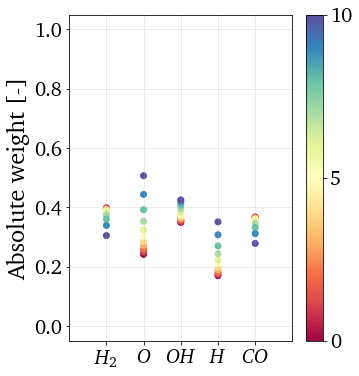

In [14]:
if save_plots: save_filename = '../images/eigenvector-weights-movement-selected-variables'
plt = reduction.analyze_eigenvector_weights_change(eigenvectors[:,0,:], state_space_names, plot_variables=[1,3,4,6,8], normalize=False, zero_norm=False, save_filename=save_filename)

If you are only interested in plotting the comparison in eigenvector weights change between the original data set and the sampled data set, you can set the eigenvectors input parameter to only contain these two sets of weights. The function will then understand that only these two should be compared:

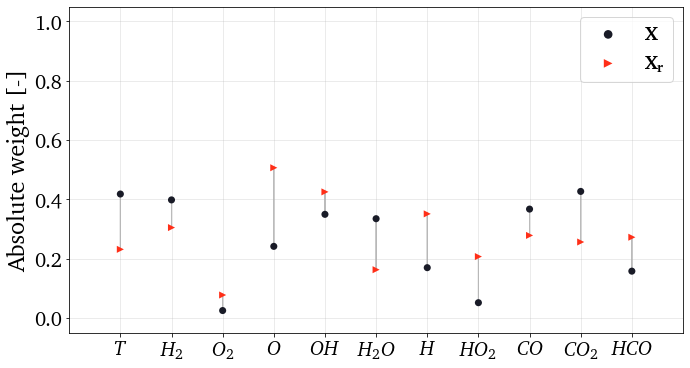

In [15]:
if save_plots: save_filename = '../images/eigenvector-weights-movement-X-Xr'
plt = reduction.analyze_eigenvector_weights_change(eigenvectors[:,0,[0,-1]], state_space_names, normalize=False, zero_norm=False, legend_label=legend_label, save_filename=save_filename)

Such plot can be done as well for pre-selected variables:

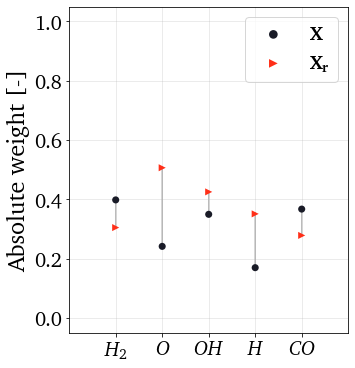

In [16]:
if save_plots: save_filename = '../images/eigenvector-weights-movement-X-Xr-selected-variables'
plt = reduction.analyze_eigenvector_weights_change(eigenvectors[:,0,[0,-1]], state_space_names, plot_variables=[1,3,4,6,8], normalize=False, zero_norm=False, legend_label=legend_label, save_filename=save_filename)

***
<a id='eigenvalue_distribution'></a>
## Eigenvalue distribution

[**Go up**](#header)

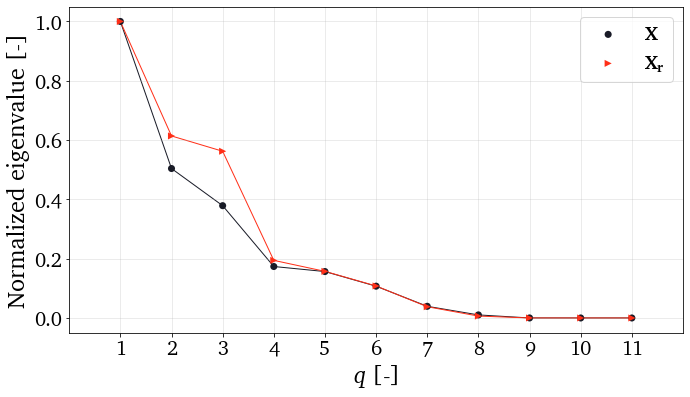

In [17]:
if save_plots: save_filename = '../images/eigenvalue-distribution'
plt = reduction.analyze_eigenvalue_distribution(state_space, idx_train, scal_crit, biasing_option, legend_label=legend_label, save_filename=save_filename)

***
<a id='biased_manifold'></a>
## Visualize biased manifold

[**Go up**](#header)

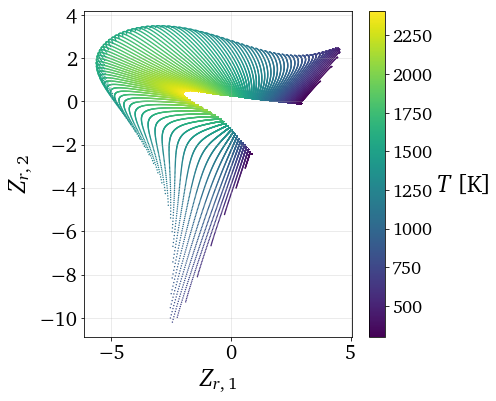

In [18]:
if save_plots: save_filename = '../images/biased-manifold'
plt = reduction.plot_2d_manifold(pc_scores[:,0,-1], pc_scores[:,1,-1], color_variable=state_space[:,0], x_label='$Z_{r, 1}$', y_label='$Z_{r, 2}$', colorbar_label='$T$ [K]', save_filename=save_filename)

***
<a id='generalized_sampling'></a>
## Generalization of PCA on sampled data set

[**Go up**](#header)

We will first inspect how many samples each cluster has:

In [19]:
print(preprocess.get_populations(idx))

[4335, 16086, 27163, 2416]


We begin by generating a sampling using the already identified clusters by K-Means algorithm:

In [20]:
sample = DataSampler(idx, idx_test=[], random_seed=random_seed, verbose=True)

and perform manual sampling. Suppose that we'd like to severly under-represent the two largest clusters and over-represent the features of the two smallest clusters. Let's select 4000 samples from $k_0$, 1000 samples from $k_1$, 1000 samples from $k_2$ and 2400 samples from $k_3$:

In [21]:
(idx_manual, _) = sample.manual({0:4000, 1:1000, 2:1000, 3:2400}, sampling_type='number', test_selection_option=1)

Cluster 0: taking 4000 train samples out of 4335 observations (92.3%).
Cluster 1: taking 1000 train samples out of 16086 observations (6.2%).
Cluster 2: taking 1000 train samples out of 27163 observations (3.7%).
Cluster 3: taking 2400 train samples out of 2416 observations (99.3%).

Cluster 0: taking 335 test samples out of 335 remaining observations (100.0%).
Cluster 1: taking 15086 test samples out of 15086 remaining observations (100.0%).
Cluster 2: taking 26163 test samples out of 26163 remaining observations (100.0%).
Cluster 3: taking 16 test samples out of 16 remaining observations (100.0%).

Selected 8400 train samples (16.8%) and 41600 test samples (83.2%).



We now perform PCA on a data set that has been sampled according to ``idx_manual``:

In [22]:
(eigenvalues, eigenvectors, pc_scores, _, _, _, _, _) = reduction.pca_on_sampled_data_set(state_space, idx_manual, scal_crit, n_components, biasing_option)

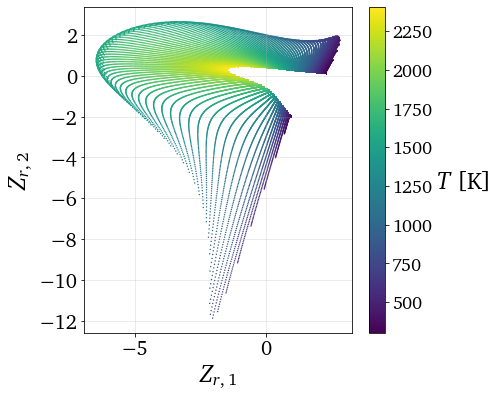

In [23]:
if save_plots: save_filename = '../images/generalize-sampling-biased-manifold'
plt = reduction.plot_2d_manifold(pc_scores[:,0], pc_scores[:,1], color_variable=state_space[:,0], x_label='$Z_{r, 1}$', y_label='$Z_{r, 2}$', colorbar_label='$T$ [K]', save_filename=save_filename)